In [1]:
import cv2
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import Dependency

# Hospitalization, ICU, and CFR computation

In [2]:
def augment_ontario_public_health(lst):
    augment = np.zeros(shape=(100,))
    augment[0:12] = np.array([lst[0]] * 12)
    augment[12:20] = np.array([lst[1]] * 8)
    augment[20:30] = np.array([lst[2]] * 10)
    augment[30:40] = np.array([lst[3]] * 10)
    augment[40:50] = np.array([lst[4]] * 10)
    augment[50:60] = np.array([lst[5]] * 10)
    augment[60:70] = np.array([lst[6]] * 10)
    augment[70:80] = np.array([lst[7]] * 10)
    augment[80:] = np.array([lst[8]] * 20)
    return augment

In [3]:
def stratification(raw=np.zeros(shape=(100, ))):
    age_stratification = np.zeros(shape=(16, ))
    for i in range(15):
        age_stratification[i] = np.sum(raw[5*i:5 * (i+1)]) / 5
    age_stratification[15] = np.sum(raw[74:]) / 25
    return age_stratification

In [4]:
d = Dependency.Dependency()
cases_read_path = d.get_dependency_path() + 'Canada_hospitalization_inference.csv'
df = pd.read_csv(cases_read_path)
print(df)
cases = np.array(list(df.cases))
hospitalization = np.array(list(df.hospitalization))
icu = np.array(list(df.ICU))
deaths = np.array(list(df.death))

(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(4, 1083, 16)
(1083, 4, 16)
(1082, 4, 16)
(1082, 4, 16)
(1082, 4, 16)
(1082, 4, 16)
(1082, 4, 16)
(1082,

In [5]:
cases_augment = augment_ontario_public_health(cases)
hospitalized_augment = augment_ontario_public_health(hospitalization)
icu_augment = augment_ontario_public_health(icu)
deaths_augment = augment_ontario_public_health(deaths)

In [6]:
cases_augment = np.reshape(np.array(cv2.GaussianBlur(cases_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))
hospitalized_augment = np.reshape(np.array(cv2.GaussianBlur(hospitalized_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))
icu_augment = np.reshape(np.array(cv2.GaussianBlur(icu_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))
deaths_augment = np.reshape(np.array(cv2.GaussianBlur(deaths_augment.reshape(100, 1), (25, 25), 0)), newshape=(100,))

In [7]:
hosp_ratio = hospitalized_augment / cases_augment
icu_ratio = icu_augment / cases_augment
cfr = deaths_augment / cases_augment

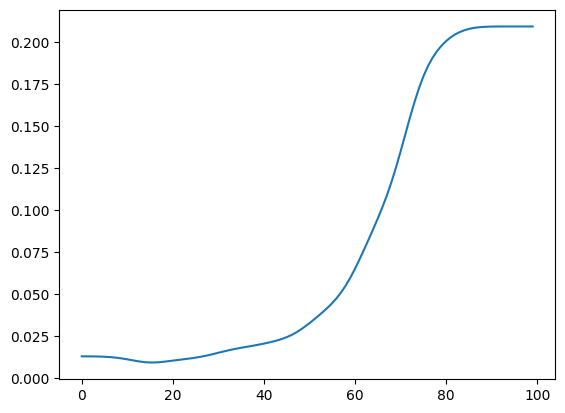

In [8]:
plt.plot(list(range(0, 100)), hosp_ratio)
plt.show()

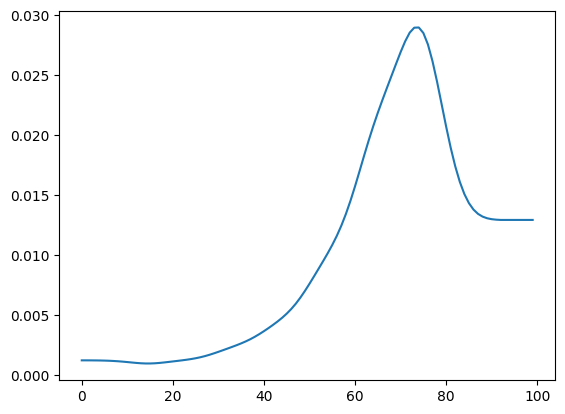

In [9]:
plt.plot(list(range(0, 100)), icu_ratio)
plt.show()

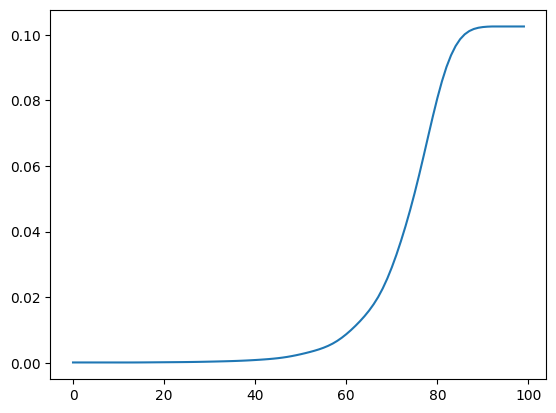

In [10]:
plt.plot(list(range(0, 100)), cfr)
plt.show()

In [11]:
case_stratified = stratification(raw=cases_augment)
hosp_stratified = stratification(raw=hosp_ratio)
icu_stratified = stratification(raw=icu_ratio)
cfr_stratified = stratification(raw=cfr)

C:\Users\loveb\AppData\Local\Temp\ipykernel_37512\2942000957.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.bar(range(0, 16), hosp_stratified)


(<AxesSubplot: >, <BarContainer object of 16 artists>)

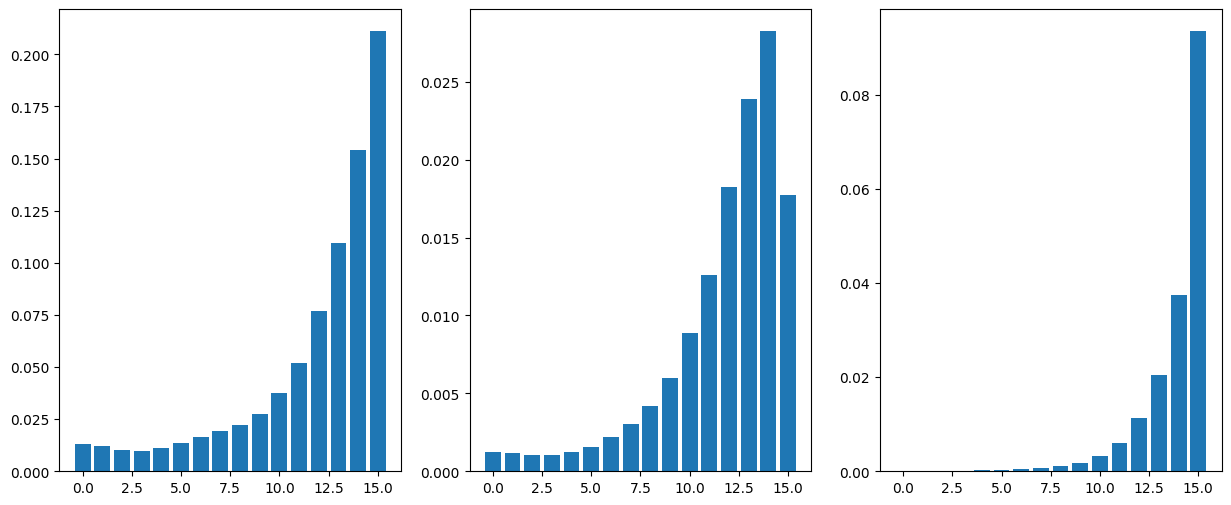

In [12]:
plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,3,1), plt.bar(range(0, 16), hosp_stratified)
plt.subplot(1,3,2), plt.bar(range(0, 16), icu_stratified)
plt.subplot(1,3,3), plt.bar(range(0, 16), cfr_stratified)

In [13]:
print(case_stratified / np.sum(case_stratified))
print(hosp_stratified)
print(np.min(hosp_stratified), np.max(hosp_stratified))
print(icu_stratified)
print(np.min(icu_stratified), np.max(icu_stratified))
print(cfr_stratified)
print(np.min(cfr_stratified), np.max(cfr_stratified))

[0.05249542 0.05111049 0.04896265 0.05790512 0.07973513 0.09132002
 0.09107228 0.0873147  0.08164537 0.07587614 0.06908633 0.06024627
 0.04856209 0.03894042 0.03145489 0.03427269]
[0.01303065 0.01235898 0.01038077 0.0097061  0.01121739 0.01336316
 0.01648061 0.01913183 0.0219753  0.02739945 0.0373693  0.05187129
 0.07685526 0.10960614 0.15406819 0.21108015]
0.00970610214209663 0.21108014703448233
[0.00122118 0.00116669 0.00101664 0.00101756 0.0012296  0.00158911
 0.0022096  0.00300761 0.00420072 0.00601005 0.00887262 0.01257768
 0.01827112 0.023918   0.02824015 0.01775055]
0.0010166416441367576 0.028240153327488575
[9.87293737e-05 9.63117654e-05 9.62190186e-05 1.30947921e-04
 1.87404371e-04 2.68738282e-04 4.14312243e-04 6.37480832e-04
 1.03892535e-03 1.82436340e-03 3.32161024e-03 5.97837815e-03
 1.13594029e-02 2.04377866e-02 3.74666196e-02 9.35947229e-02]
9.621901860300807e-05 0.09359472293613287


In [14]:
susceptibility_raw = np.zeros(shape=(100, ))

susceptibility_raw[0:10] = 0.4
susceptibility_raw[10:20] = 0.38
susceptibility_raw[20:30] = 0.79
susceptibility_raw[30:40] = 0.86
susceptibility_raw[40:50] = 0.8
susceptibility_raw[50:60] = 0.82
susceptibility_raw[60:70] = 0.88
susceptibility_raw[70:100] = 0.74

susceptibility = np.reshape(np.array(cv2.GaussianBlur(susceptibility_raw.reshape(100, 1), (25, 25), 0)),
                            newshape=(100,))

susceptibility_stratified = stratification(raw=susceptibility)

In [15]:
clinical_raw = np.zeros(shape=(100, ))

clinical_raw[0:10] = 0.29
clinical_raw[10:20] = 0.21
clinical_raw[20:30] = 0.27
clinical_raw[30:40] = 0.33
clinical_raw[40:50] = 0.4
clinical_raw[50:60] = 0.49
clinical_raw[60:70] = 0.63
clinical_raw[70:100] = 0.69

clinical = np.reshape(np.array(cv2.GaussianBlur(clinical_raw.reshape(100, 1), (25, 25), 0)),
                            newshape=(100,))

clinical_stratified = stratification(raw=clinical)

C:\Users\loveb\AppData\Local\Temp\ipykernel_37512\3064032288.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1), plt.plot(susceptibility_raw)


(<AxesSubplot: >, [<matplotlib.lines.Line2D at 0x1e3f13d0710>])

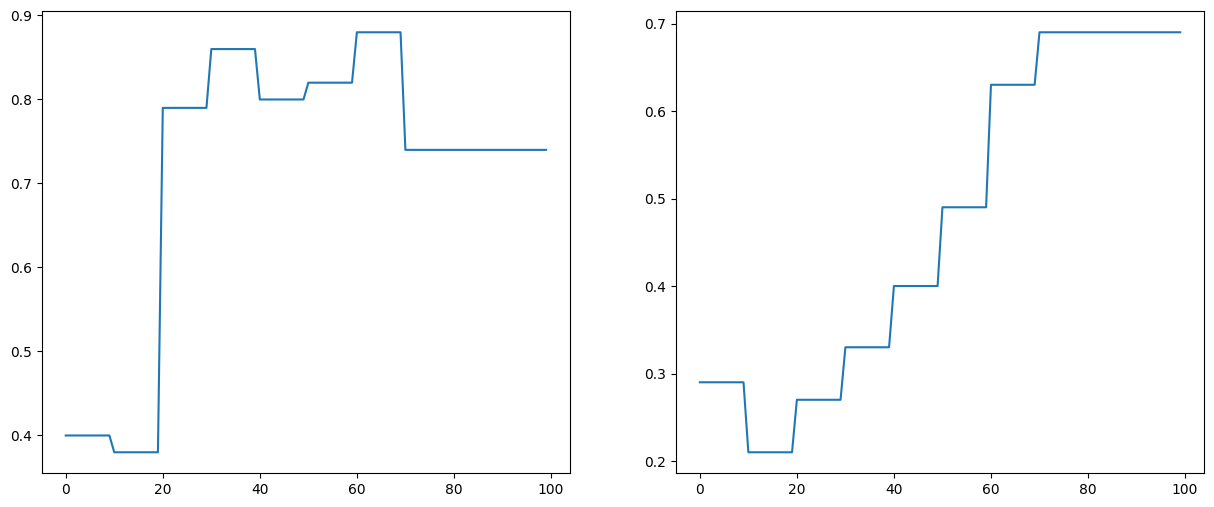

In [16]:
plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,2,1), plt.plot(susceptibility_raw)
plt.subplot(1,2,2), plt.plot(clinical_raw)

C:\Users\loveb\AppData\Local\Temp\ipykernel_37512\2164501570.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1), plt.plot(susceptibility)


(<AxesSubplot: >, [<matplotlib.lines.Line2D at 0x1e3efd90fd0>])

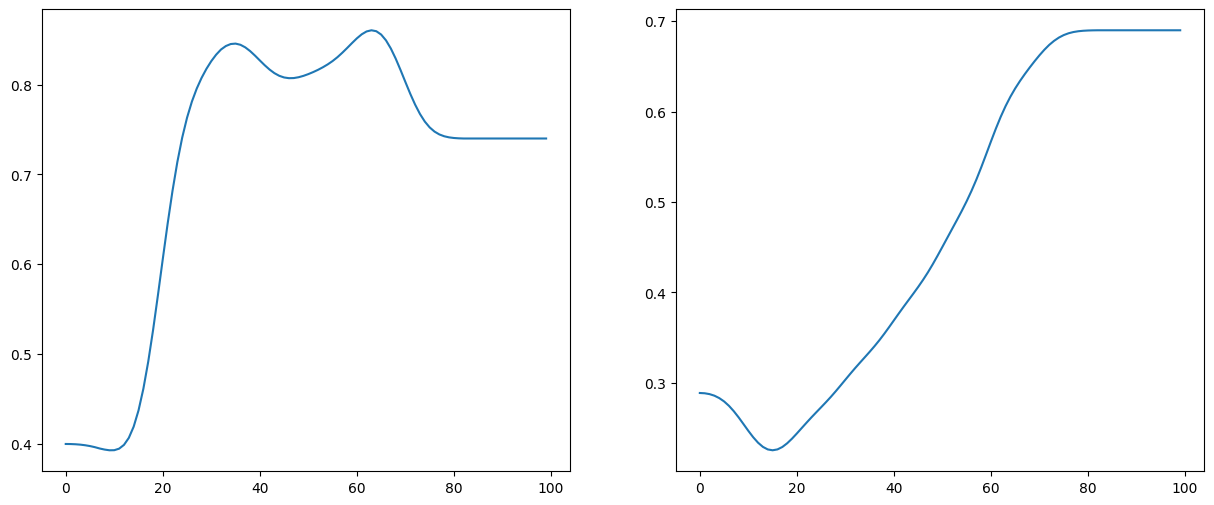

In [17]:
plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,2,1), plt.plot(susceptibility)
plt.subplot(1,2,2), plt.plot(clinical)

C:\Users\loveb\AppData\Local\Temp\ipykernel_37512\991191349.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1), plt.bar(range(0, 16), susceptibility_stratified)


(<AxesSubplot: >, <BarContainer object of 16 artists>)

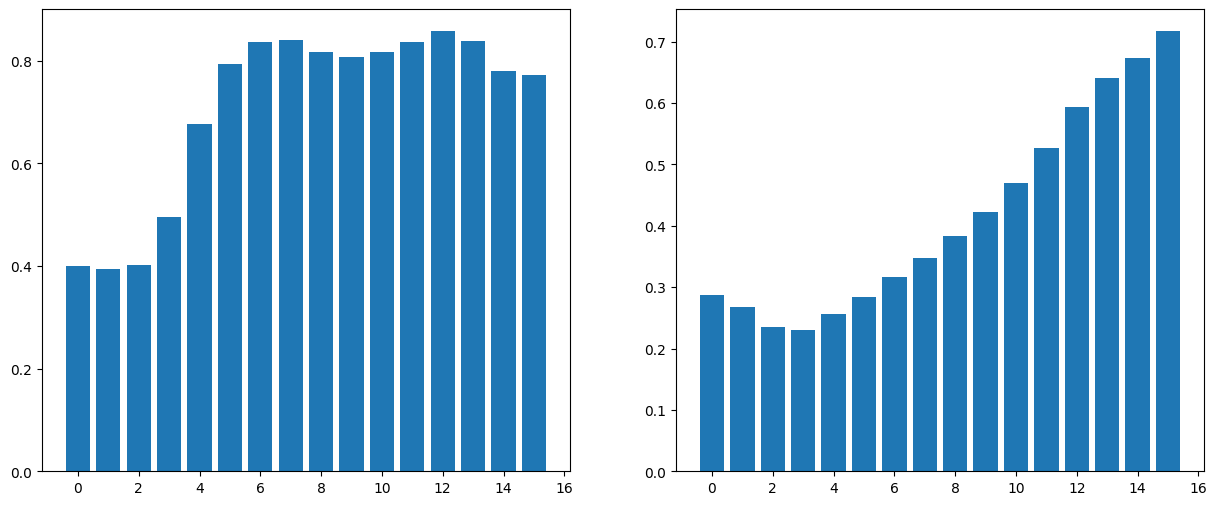

In [18]:
plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,2,1), plt.bar(range(0, 16), susceptibility_stratified)
plt.subplot(1,2,2), plt.bar(range(0, 16), clinical_stratified)

In [19]:
print(susceptibility_stratified)
print(clinical_stratified)

[0.39913273 0.39480753 0.40223409 0.49633826 0.67740259 0.79304503
 0.83741945 0.84029129 0.81763046 0.80812577 0.81686202 0.83593571
 0.8574139  0.8381473  0.7793588  0.77151861]
[0.2865309  0.26753682 0.23495708 0.23019938 0.25561971 0.28454104
 0.31587461 0.34737841 0.38386853 0.42265894 0.47025061 0.52584302
 0.59291004 0.64122657 0.67295434 0.71677774]


## Fraction calculation (normalization)

In [20]:
case_dist = cases_augment/ np.sum(cases_augment)
hosp_dist = hospitalized_augment / np.sum(hospitalized_augment)
icu_dist = icu_augment/ np.sum(icu_augment)
deaths_dist = deaths_augment / np.sum(deaths_augment)

print(sum(case_dist), sum(hosp_dist), sum(icu_dist), sum(deaths_dist))

1.0 0.9999999999999997 0.9999999999999999 0.9999999999999998


C:\Users\loveb\AppData\Local\Temp\ipykernel_37512\102850893.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1), plt.plot(case_dist)


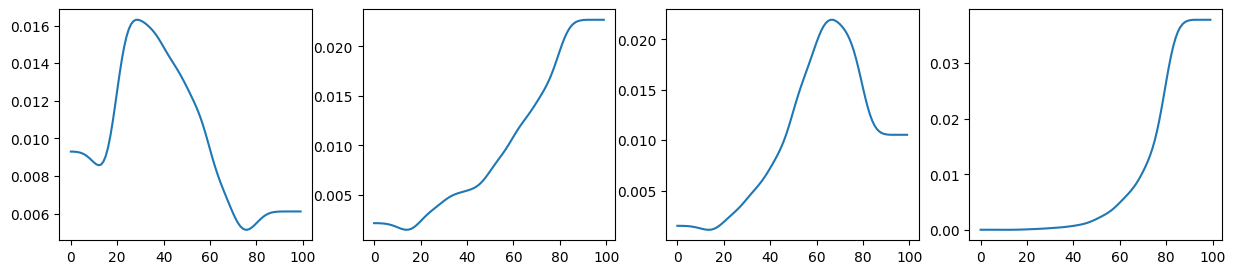

1.0 0.9999999999999997 0.9999999999999999 0.9999999999999998


In [21]:
plt.figure(figsize=(15,3))
plt.subplot()
plt.subplot(1,4,1), plt.plot(case_dist)
plt.subplot(1,4,2), plt.plot(hosp_dist)
plt.subplot(1,4,3), plt.plot(icu_dist)
plt.subplot(1,4,4), plt.plot(deaths_dist)
plt.show()
print(sum(case_dist), sum(hosp_dist), sum(icu_dist), sum(deaths_dist))

In [22]:
case_dist = stratification(case_dist)
hosp_dist = stratification(hosp_dist)
icu_dist = stratification(icu_dist)
deaths_dist = stratification(deaths_dist)

# Normalize

case_dist = case_dist / np.sum(case_dist)
hosp_dist = hosp_dist /  np.sum(hosp_dist)
icu_dist = icu_dist / np.sum(icu_dist)
deaths_dist = deaths_dist /  np.sum(deaths_dist)

print(sum(case_dist), sum(hosp_dist), sum(icu_dist), sum(deaths_dist))

1.0000000000000002 1.0 0.9999999999999999 1.0


C:\Users\loveb\AppData\Local\Temp\ipykernel_37512\386793711.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1), plt.bar(range(0, 16), case_dist)


(<AxesSubplot: >, <BarContainer object of 16 artists>)

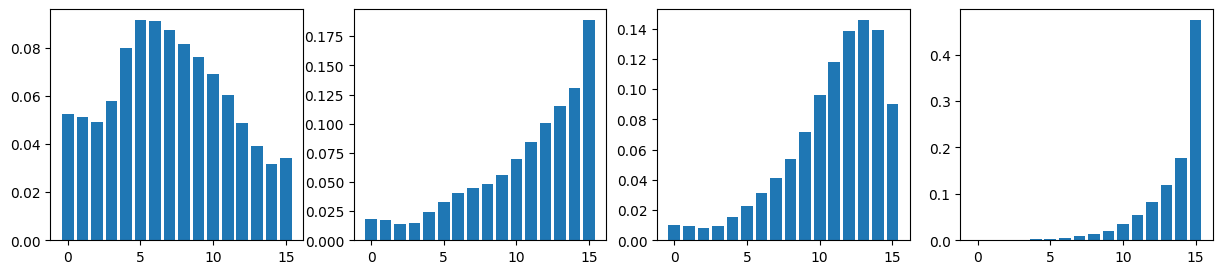

In [23]:
plt.figure(figsize=(15,3))
plt.subplot()
plt.subplot(1,4,1), plt.bar(range(0, 16), case_dist)
plt.subplot(1,4,2), plt.bar(range(0, 16), hosp_dist)
plt.subplot(1,4,3), plt.bar(range(0, 16), icu_dist)
plt.subplot(1,4,4), plt.bar(range(0, 16), deaths_dist)


In [24]:
print(case_dist)
print(hosp_dist)
print(icu_dist)
print(deaths_dist)

[0.05249542 0.05111049 0.04896265 0.05790512 0.07973513 0.09132002
 0.09107228 0.0873147  0.08164537 0.07587614 0.06908633 0.06024627
 0.04856209 0.03894042 0.03145489 0.03427269]
[0.01850005 0.01709116 0.01374572 0.01524114 0.02426419 0.03302322
 0.04057495 0.04515149 0.04847928 0.05612047 0.06963836 0.08406513
 0.10022135 0.11472814 0.13049681 0.18865855]
[0.01006172 0.00936271 0.00781271 0.00928596 0.01545035 0.02279748
 0.03156158 0.04115525 0.05372844 0.07139009 0.09591567 0.11829946
 0.13837513 0.14563542 0.13922661 0.08994143]
[0.0007869  0.00074751 0.00071538 0.00116392 0.00228272 0.00373057
 0.00572339 0.00843267 0.01284209 0.02093249 0.03467635 0.05417828
 0.08282102 0.11956677 0.17747129 0.47392865]


In [25]:
print(np.sum(icu) / np.sum(hospitalization))

0.1540844459589232
